<a href="https://colab.research.google.com/github/linainsaf/image_audio_processing/blob/main/basic_image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from google.colab.patches import cv2_imshow
from PIL import Image

In [ ]:
def extract_red(image):
  #read image
  src = cv2.imread(image, cv2.IMREAD_UNCHANGED)

  # extract red channel
  red_channel = src[:,:,2]

  # create empty image with same shape as that of src image
  red_img = np.zeros(src.shape)

  #assign the red channel of src to empty image
  red_img[:,:,2] = red_channel

  #save image
  imwrite= cv2.imwrite('red-channel.jpg',red_img)  
  if imwrite:
	  print('Image is successfully saved as file.')

Image is successfully saved as file.


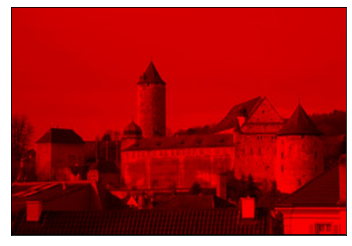

In [ ]:
extract_red('donjon.png')
img = mpimg.imread('red-channel.jpg')
plt.figure(figsize=(6,6))
plt.imshow(img, cmap=plt.cm.gray)
plt.xticks(())
plt.yticks(())
plt.show()

In [ ]:
def negative_image(image):
  #read image
  src = cv2.imread(image, cv2.IMREAD_UNCHANGED)
  # create empty image with same shape as that of src image
  neg_img = np.zeros(src.shape)
  height=len(src)
  width = len(src[0])
  for row in range(height):
      for col in range(width):
          red = 255-src[row][col][0]
          green =255-src[row][col][1]
          blue = 255-src[row][col][2]
          neg_img[row][col]=[red,green,blue,255]
  #save image
  imwrite=cv2.imwrite('negative_image.jpg',neg_img) 
  if imwrite:
	  print('Image is successfully saved as file.')

Image is successfully saved as file.


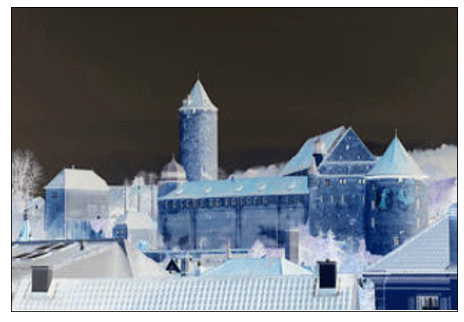

In [ ]:
negative_image('donjon.png')
img = mpimg.imread('negative_image.jpg')
plt.figure(figsize=(8,8))
plt.imshow(img, cmap=plt.cm.gray)
plt.xticks(())
plt.yticks(())
plt.show()

In [ ]:
def gray_image(image):
  #read image
  src = cv2.imread(image, cv2.IMREAD_UNCHANGED)
  # create empty image with same shape as that of src image
  gray_img = np.zeros(src.shape)
  weights = [0.2989, 0.5870, 0.1140]
  gray_img = np.dot(src[...,:3], weights)
  #save image
  imwrite=cv2.imwrite('gray_image.jpg',gray_img) 
  if imwrite:
	  print('Image is successfully saved as file.')

Image is successfully saved as file.


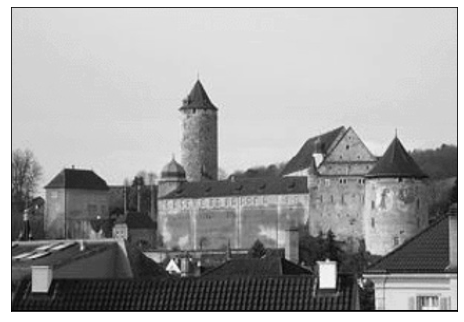

In [ ]:
gray_image('donjon.png')
img = mpimg.imread('gray_image.jpg')
plt.figure(figsize=(8,8))
plt.imshow(img,cmap=plt.cm.gray)
plt.xticks(())
plt.yticks(())
plt.show()

NB : en cas de saturation (intensité résultante>255), mettre la valeur à 255.

In [ ]:
def sepia(image):
    img = Image.open(image)
    width, height = img.size

    pixels = img.load() # create the pixel map

    for py in range(height):
     for px in range(width):
         r, g, b ,a = img.getpixel((px, py))

         tr = int(0.393 * r + 0.769 * g + 0.189 * b)
         tg = int(0.349 * r + 0.686 * g + 0.168 * b)
         tb = int(0.272 * r + 0.534 * g + 0.131 * b)

         if tr > 255:
             tr = 255

         if tg > 255:
             tg = 255

         if tb > 255:
             tb = 255
         pixels[px, py] = (tr,tg,tb,a)
    img.save('sepia_image.png') 

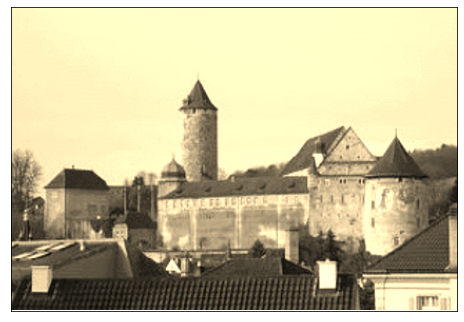

In [ ]:
sepia('donjon.png')
img = mpimg.imread('sepia_image.png')
plt.figure(figsize=(8,8))
plt.imshow(img,cmap=plt.cm.gray)
plt.xticks(())
plt.yticks(())
plt.show()

"Contrast". Pour chaque composante de chaque pixel, appliquez les règles
suivantes :

a. Si la valeur est plus petite que 30, assignez la valeur 0.

b. Si la valeur est plus grande que 225, assignez la valeur 255.

c. Les valeurs c comprises entre 30 et 225 seront recalculées avec la
formule : (255.0 / 195.0) * (c - 30) + 0.5

In [ ]:
def contrast(image):
    img = Image.open(image)
    width, height = img.size

    pixels = img.load() # create the pixel map

    for py in range(height):
     for px in range(width):
         r, g, b ,a= img.getpixel((px, py))
         if r<30:
             tr = 0
         if g<30:
             tg = 0
         if b<30:
             tb = 0
         if r>255:
             tr = 255
         if g>255:
             tg = 255
         if b>255:
             tb = 255
         if 0<=r<=255:
             tr = int((255.0 / 195.0) * (r - 30) + 0.5)
         if 0<=g<=255:
             tg = int((255.0 / 195.0) * (g - 30) + 0.5)
         if 0<=b<=255:
             tb = int((255.0 / 195.0) * (b - 30) + 0.5)
        
         pixels[px, py] = (tr,tg,tb,a)
    img.save('contrast_image.png') 

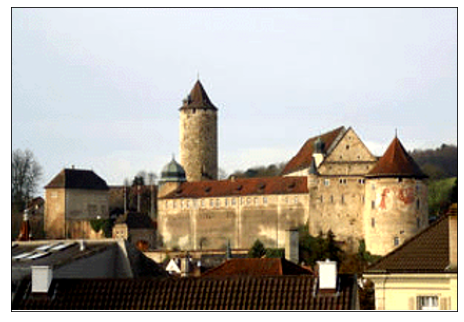

In [ ]:
contrast('donjon.png')
img = mpimg.imread('contrast_image.png')
plt.figure(figsize=(8,8))
plt.imshow(img,cmap=plt.cm.gray)
plt.xticks(())
plt.yticks(())
plt.show()

In [ ]:
def seuillage_gray(image,seuil_min,seuil_max):
    img = Image.open(image)
    width, height = img.size

    pixels = img.load() # create the pixel map

    for py in range(height):
     for px in range(width):
         gray= img.getpixel((px, py))
         if gray<seuil_min:
             gray= 0      
         if gray>seuil_max:
             gray= 255      
         pixels[px, py] = (gray)
    img.save('seuil_gray_image.png') 

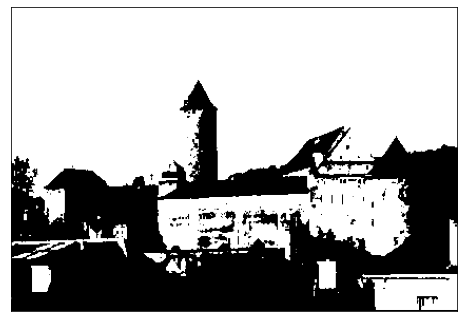

In [ ]:
seuillage_gray('gray_image.jpg',123,123)
img = mpimg.imread('seuil_gray_image.png')
plt.figure(figsize=(8,8))
plt.imshow(img,cmap=plt.cm.gray)
plt.xticks(())
plt.yticks(())
plt.show()

In [ ]:
def seuillage(image,seuil_min,seuil_max):
    img = Image.open(image)
    width, height = img.size

    pixels = img.load() # create the pixel map

    for py in range(height):
     for px in range(width):
         r,g,b,a = img.getpixel((px, py))
         if r<seuil_min:
           r= 0      
         if g>seuil_min:
           g= 0     
         if b<seuil_min:
           b= 0
         if r<seuil_max:
           r = 255
         if g<seuil_max:
           g = 255
         if b>seuil_max:
           b= 255

         pixels[px, py] = (r,g,b,a)
    img.save('seuil_image.png') 

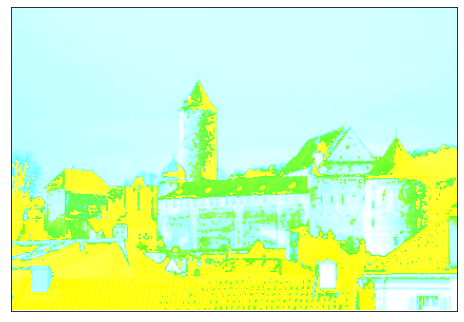

In [ ]:
seuillage('donjon.png',23,93)
plt.figure(figsize=(8,8))
img = mpimg.imread('seuil_image.png')
plt.imshow(img,cmap=plt.cm.gray)
plt.xticks(())
plt.yticks(())
plt.show()

In [ ]:
def flip(image):
    img = Image.open(image)
    img = img.rotate(180)
    img.save('flip_image.png')

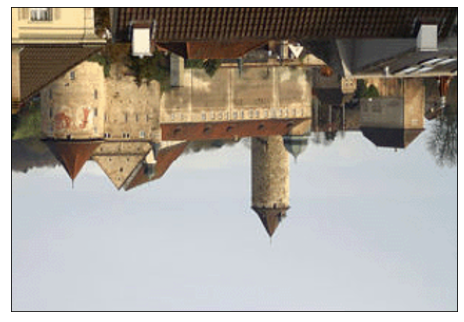

In [ ]:
flip("donjon.png")
plt.figure(figsize=(8,8))
img = mpimg.imread('flip_image.png')
plt.imshow(img,cmap=plt.cm.gray)
plt.xticks(())
plt.yticks(())
plt.show()

In [ ]:
def blue_border(image):
  img = cv2.imread(image)
  row, col = img.shape[:2]
  bordersize = 5
  border = cv2.copyMakeBorder(img,top=bordersize,bottom=bordersize,left=bordersize,right=bordersize,borderType=cv2.BORDER_CONSTANT,value=[255, 0, 0])
  imwrite=cv2.imwrite('blue_border.png',border) 
  if imwrite:
	  print('Image is successfully saved as file.')

Image is successfully saved as file.


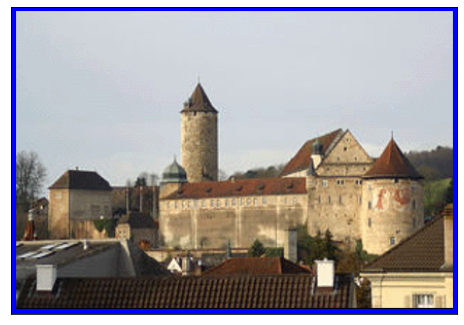

In [ ]:
blue_border("donjon.png")
img = mpimg.imread('blue_border.png')
plt.figure(figsize=(8,8))
plt.imshow(img)
plt.xticks(())
plt.yticks(())
plt.show()

In [ ]:
def relief_border(image):
  img = Image.open(image)
  width, height = img.size
  bordersize = 20
  pixels = img.load() # create the pixel map
  for py in range(bordersize):
    for px in range(width):
        r,g,b = img.getpixel((px, py))
        pixels[px, py] = (r+65,g+65,b+65)
  for py in range(height):
    for px in range(bordersize):
        r,g,b = img.getpixel((px, py))
        pixels[px, py] = (r-40,g-40,b-40)
  for py in range(height-bordersize,height):
    for px in range(width):
        r,g,b = img.getpixel((px, py))
        pixels[px, py] = (r-65,g-65,b-65)
  for py in range(height):
    for px in range(width-bordersize,width):
        r,g,b = img.getpixel((px, py))
        pixels[px, py] = (r-40,g-40,b-40)

  img.save('relief_border.png') 

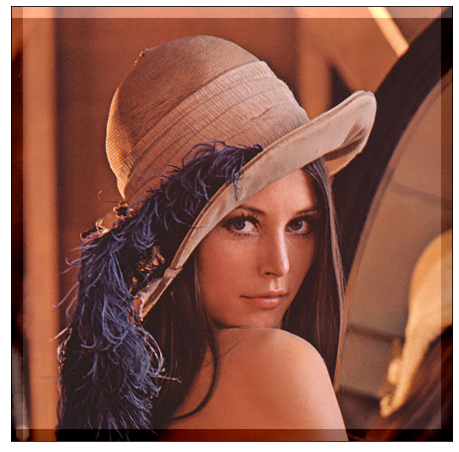

In [ ]:
relief_border("Lena.jpg")
img = mpimg.imread('relief_border.png')
plt.figure(figsize=(8,8))
plt.imshow(img)
plt.xticks(())
plt.yticks(())
plt.show()

In [ ]:
def pixel_image(image):
    img = Image.open(image)
    img = img.resize((img.size[0] // 10, img.size[1] // 10),Image.NEAREST)
    img = img.resize((img.size[0] * 10, img.size[1] * 10),Image.NEAREST)
    img.save('pixel_image.png')

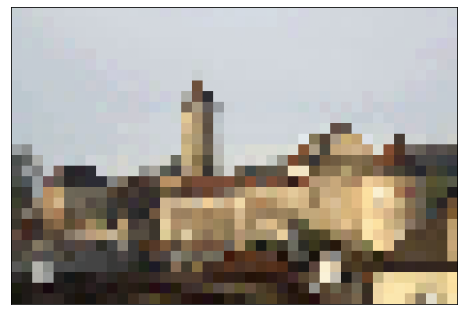

In [ ]:
pixel_image("donjon.png")
img = mpimg.imread('pixel_image.png')
plt.figure(figsize=(8,8))
plt.imshow(img)
plt.xticks(())
plt.yticks(())
plt.show()